In [ ]:
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import numpy as np
# numpy is aliased as np

#### How to install nasdaqdatalink library

1) In CMD<br>
pip install nasdaq-data-link

2) In Jupyter<br>
!pip install nasdaq-data-link

In [ ]:
# !pip install nasdaq-data-link

In [ ]:
import nasdaqdatalink

In [ ]:
df = nasdaqdatalink.get("BP/ELEC_GEN_IND")
df.head()

,Value
Date,
1985-12-31,186.385834
1986-12-31,202.677201
1987-12-31,223.669490
1988-12-31,241.304620
1989-12-31,272.446431


In [ ]:
df.shape
# number of rows= 37, number of columns=1

(37, 1)

#### Saving the data

In [ ]:
df.to_csv('elec_gen_nasdaq.csv')

#### Handling null values

In [ ]:
df.isnull().sum()

Value    0
dtype: int64

In [ ]:
df

,Value
Date,
1985-12-31,186.385834
1986-12-31,202.677201
1987-12-31,223.669490
1988-12-31,241.304620
1989-12-31,272.446431
1990-12-31,287.762827
1991-12-31,320.457631
1992-12-31,337.153321
1993-12-31,362.176251


In [ ]:
print(df.index.min())
print(df.index.max())

1985-12-31 00:00:00
2021-12-31 00:00:00


#### Plot the electricity generation data

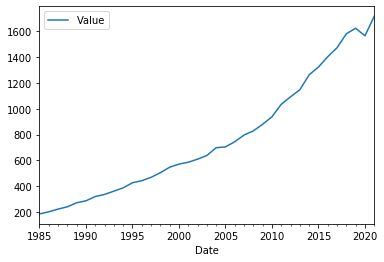

In [ ]:
df.plot()
plt.show()

#### Additive Seasonal Decomposition

Additive Decomposition<br>
Time series data = Trend + Seasonality + Irregularity

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

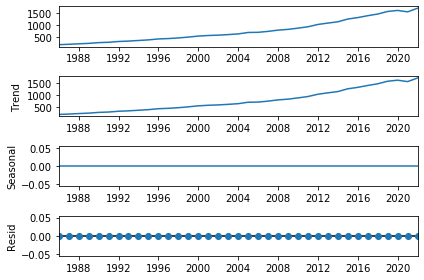

In [ ]:
decompose = seasonal_decompose(df,model='additive')
decompose.plot()  # original + trend + seasonality + irregular components
plt.show()

In [ ]:
df.dtypes

Value    float64
dtype: object

In [ ]:
df.columns

Index(['Value'], dtype='object')

#### Split the data into train and test

In [ ]:
train = df['Value'][:30]
test = df['Value'][30:]
print(train.shape)
print(test.shape)
print(type(train))
print(type(test))

(30,)
(7,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Plotting the train and test data

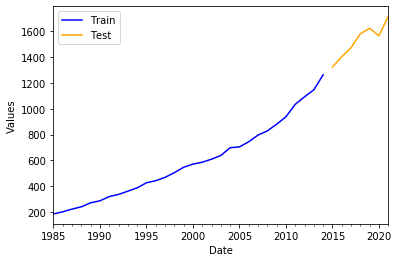

In [ ]:
train.plot(color='blue',label='Train')
test.plot(color='orange',label='Test')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
train.tail()

Date
2010-12-31     937.468038
2011-12-31    1034.011325
2012-12-31    1091.837882
2013-12-31    1146.139133
2014-12-31    1262.219968
Name: Value, dtype: float64

In [ ]:
test.head()

Date
2015-12-31    1322.097472
2016-12-31    1401.741765
2017-12-31    1471.342326
2018-12-31    1579.191220
2019-12-31    1622.099813
Name: Value, dtype: float64

#### Creating a function to compute Mean Squared Error,Root Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# ytest = test data, ypred = forecasted data

def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)

#### ARIMA
ARIMA (Auto Regressive Integrated Moving Average)<br>
It takes 3 parameters (p,d,q)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### Model - 1 ARIMA with (p=2,d=1,q=2) 

In [ ]:
# order = (p=2,d=1,q=2)
m1 = ARIMA(train,order=(2,1,2))
ar_m1 = m1.fit()

E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(test.shape)

(7,)


In [ ]:
fcast_m1 = ar_m1.forecast(7)
fcast_m1

2015-12-31    1340.346778
2016-12-31    1429.317840
2017-12-31    1522.313995
2018-12-31    1616.395483
2019-12-31    1710.299389
2020-12-31    1803.487558
2021-12-31    1895.735030
Freq: A-DEC, dtype: float64

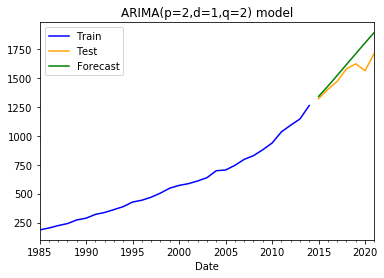

In [ ]:
train.plot(color="blue", label='Train')
test.plot(color="orange", label='Test')
fcast_m1.plot(color="green", label='Forecast')
plt.title('ARIMA(p=2,d=1,q=2) model')
plt.legend()
plt.show()

In [ ]:
eval_model(test,fcast_m1)

MAE 91.89662339937442
MSE 14751.757209487349
RMSE 121.45681211643647


#### Model - 2 ARIMA(p=1,d=1,q=1)

In [ ]:
# order(p=1,d=1,q=1)
m2 = ARIMA(train,order=(1,1,1))
ar_m2 = m2.fit()

E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
print(test.shape)

(7,)


In [ ]:
fcast_m2 = ar_m2.forecast(7)
fcast_m2

2015-12-31    1341.291898
2016-12-31    1419.687854
2017-12-31    1497.413617
2018-12-31    1574.474914
2019-12-31    1650.877427
2020-12-31    1726.626787
2021-12-31    1801.728579
Freq: A-DEC, dtype: float64

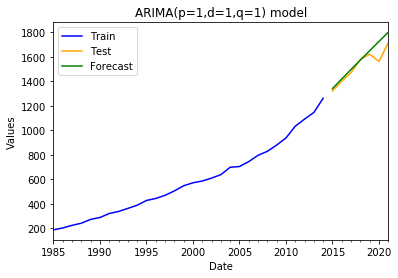

In [ ]:
train.plot(color="blue", label='Train')
test.plot(color="orange", label='Test')
fcast_m2.plot(color="green", label='Forecast')
plt.title('ARIMA(p=1,d=1,q=1) model')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
eval_model(test,fcast_m2)

MAE 49.55913979678433
MSE 5205.801723311837
RMSE 72.15124200810293


#### Inference
ARIMA(p=1,d=1,q=1) is a better performing model than ARIMA(p=2,d=1,q=2)

In [ ]:
eval_model(test,fcast_m1)

MAE 91.89662339937442
MSE 14751.757209487349
RMSE 121.45681211643647
